
LSTM

## Part 1 - Data Preprocessing

### Importing the libraries

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sklearn


### Importing the training set

In [ ]:
dataset_test = pd.read_csv('/content/cu_test.csv')
test = dataset_test.sample(frac=1)
print(test)
dataset_train = pd.read_csv('/content/cu_Train.csv')
df = dataset_train.sample(frac=1)
print(df)

       OID  LONGITUDE   LATITUDE       CU
1786  1786  74.577075  28.621447   42.000
1807  1807  74.802111  28.634389   40.000
1521  1521  74.964420  28.457540   73.993
376    376  74.279556  27.634139   40.000
544    544  75.631867  27.743644  128.000
...    ...        ...        ...      ...
481    481  74.342861  27.691917   42.000
187    187  74.402972  27.486639   26.000
1000  1000  75.250000  28.189500   18.437
1858  1858  74.720825  28.673947   44.000
1168  1168  74.712222  28.289639   47.000

[1986 rows x 4 columns]
       FID  LONGITUDE   LATITUDE      CU  gridcode
1184  1185  74.153175  27.545584   3.000         0
2739  2740  74.261100  27.974200   3.000         0
2854  2855  75.280502  27.993635  13.432         0
231    232  75.010101  27.313169   7.000         0
2416  2417  74.923556  27.897806  11.000         0
...    ...        ...        ...     ...       ...
3229  3230  74.076919  28.115250   8.000         0
1953  1954  75.300735  27.777071   9.000         0
2307  2308  

In [ ]:
test_set = test.iloc[:, 3].values
test.info()
test_set.shape

<class 'pandas.core.frame.DataFrame'>
Index: 1986 entries, 1786 to 1168
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   OID        1986 non-null   int64  
 1   LONGITUDE  1986 non-null   float64
 2   LATITUDE   1986 non-null   float64
 3   CU         1986 non-null   float64
dtypes: float64(3), int64(1)
memory usage: 77.6 KB


(1986,)

In [ ]:


training_set = df.iloc[:, 3:].values
df.info()
training_set.shape

<class 'pandas.core.frame.DataFrame'>
Index: 4566 entries, 1184 to 821
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   FID        4566 non-null   int64  
 1   LONGITUDE  4566 non-null   float64
 2   LATITUDE   4566 non-null   float64
 3   CU         4566 non-null   float64
 4   gridcode   4566 non-null   int64  
dtypes: float64(3), int64(2)
memory usage: 214.0 KB


(4566, 2)

### Feature Scaling

In [ ]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(training_set)
training_set_scaled.shape


(4566, 2)

In [ ]:
test_set_reshaped = np.array(test_set).reshape(-1, 1)
fc = MinMaxScaler(feature_range = (0, 1))
test_set_scaled = fc.fit_transform(test_set_reshaped)
test_set_scaled.shape

### Creating a data structure with 60 timesteps and 1 output

60 timestamp means the RNN is going to look at the 60 stock prices before time T, i.e., stock prices between 60 days before time T. Based on the trends it is capturing these 60 previous timestamps and it will try to predict next output.

In [ ]:
X_train = []
y_train = []
for i in range(60, 4566):
    X_train.append(training_set_scaled[i-60:i, 0])
    y_train.append(training_set_scaled[i, 1])
X_train, y_train = np.array(X_train), np.array(y_train)
X_train.shape

#y_train.shape
#len(y_train)
#len(X_train)


(4506, 60)

In [ ]:
X_test = []
for i in range(60, 1986):
    X_test.append(test_set_scaled[i-60:i, 0])
Y_test = np.array(X_test)
Y_test.shape

For each financial day, X_train will contain 60 previous stock prices and y_train contain stock price next financial day. In X_train, we are going to append 60 stock prices before ith financial day, and 0 is the column of index in training_set_scaled array.
Later X_train and y_train are made numpy array as that can be accepted as RNN

### Reshaping

In [ ]:
trainifyx = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
trainifyx.shape
#X_train.shape[1]
#X_train.shape[0]


(4506, 60, 1)

In [ ]:
testingy = np.reshape(Y_test, (Y_test.shape[0], Y_test.shape[1], 1))
testingy.shape

## Part 2 - Building and Training the RNN

### Importing the Keras libraries and packages

In [ ]:
!pip install tensorflow

In [ ]:
import tensorflow as tf
from tensorflow import keras

In [ ]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout
from keras import regularizers
from tensorflow.keras.callbacks import EarlyStopping

In [ ]:
early_stopping = EarlyStopping(monitor='loss', patience=4)

### Initialising the RNN

In [ ]:
regressor = Sequential()
# regressor is an object of squential class and
#represents a sequeance of layers


### Adding the first LSTM layer and some Dropout regularisation

In [ ]:
regressor.add(LSTM(units = 32, return_sequences = True, input_shape = (X_train.shape[1], 1), kernel_regularizer = regularizers.l2(0.01)))
regressor.add(Dropout(0.3))

### Adding a second LSTM layer and some Dropout regularisation

### Adding the output layer

In [ ]:
regressor.add(Dense(units = 1))

### Compiling the RNN

In [ ]:
learning_rate = 0.0001

In [ ]:

optimizer = tf.keras.optimizers.Adam(learning_rate = learning_rate)
regressor.compile(optimizer = optimizer, loss = 'mean_squared_error')

### Fitting the RNN to the Training set

In [ ]:
regressor.fit(trainifyx, y_train, epochs = 20 , batch_size = 32, callbacks= [early_stopping])

Epoch 1/20
141/141 [==============================] - 7s 35ms/step - loss: 0.0305
Epoch 2/20
141/141 [==============================] - 4s 26ms/step - loss: 0.0273
Epoch 3/20
141/141 [==============================] - 4s 26ms/step - loss: 0.0248
Epoch 4/20
141/141 [==============================] - 5s 33ms/step - loss: 0.0227
Epoch 5/20
141/141 [==============================] - 4s 30ms/step - loss: 0.0210
Epoch 6/20
141/141 [==============================] - 4s 27ms/step - loss: 0.0195
Epoch 7/20
141/141 [==============================] - 4s 30ms/step - loss: 0.0184
Epoch 8/20
141/141 [==============================] - 5s 33ms/step - loss: 0.0174
Epoch 9/20
141/141 [==============================] - 4s 28ms/step - loss: 0.0166
Epoch 10/20
141/141 [==============================] - 4s 31ms/step - loss: 0.0160
Epoch 11/20
141/141 [==============================] - 4s 31ms/step - loss: 0.0155
Epoch 12/20
141/141 [==============================] - 4s 26ms/step - loss: 0.0151
Epoch 13/20
1

In [ ]:
train_predict = regressor.predict(trainifyx)

141/141 [==============================] - 2s 8ms/step


In [ ]:
test_predict = regressor.predict(testingy)

61/61 [==============================] - 1s 9ms/step


In [ ]:
train_predict

array([[[0.01517234],
        [0.0156559 ],
        [0.01581563],
        ...,
        [0.01580618],
        [0.01581624],
        [0.01583586]],

       [[0.01515354],
        [0.01563596],
        [0.01584225],
        ...,
        [0.01581624],
        [0.01583586],
        [0.01583418]],

       [[0.015141  ],
        [0.01566551],
        [0.01581782],
        ...,
        [0.01583586],
        [0.01583418],
        [0.01582726]],

       ...,

       [[0.01518086],
        [0.01564985],
        [0.01583206],
        ...,
        [0.01580532],
        [0.01579714],
        [0.01580332]],

       [[0.01514414],
        [0.01565107],
        [0.01581685],
        ...,
        [0.01579714],
        [0.01580332],
        [0.015812  ]],

       [[0.01515981],
        [0.01564156],
        [0.01583192],
        ...,
        [0.01580332],
        [0.015812  ],
        [0.0158248 ]]], dtype=float32)

In [ ]:
train_pre = np.reshape(train_predict, (4506, 60))
test_pre = np.reshape(test_predict, (1926, 60))
rup = train_pre[:, 0]
yes = test_pre[:, 0]

you = train_pre[4505, :]
we= you.reshape(60,1)
output = np.append(rup, we)

yes2 = test_pre[1925, :]
vee = yes2.reshape(60,1)
outtest = np.append(yes, vee)

In [ ]:
outtest.shape

(1986,)

In [ ]:
df = pd.DataFrame(output)
df.to_csv('output2.csv', index=False)
testt = pd.DataFrame(outtest)
testt.to_csv('testout2.csv', index=False)

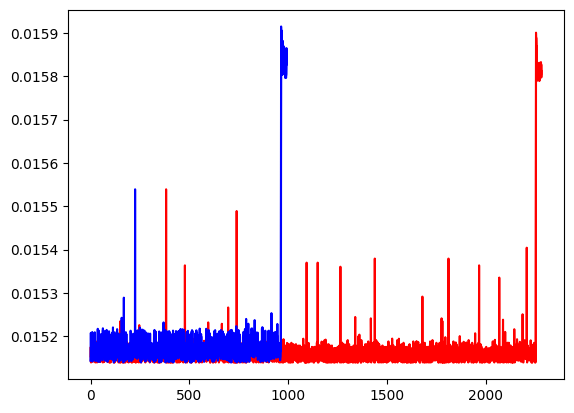

In [ ]:

plt.plot(output, color = 'red', label = 'training')
plt.plot(outtest, color = 'blue', label = 'test')
#plt.title('')
#plt.xlabel('')
#plt.ylabel('')
#plt.legend()
plt.show()